# Final Project : Prediction of H1-B Visa Application Status


![alt text](https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAadAAAAJGYzNjcwY2E5LWZiZGMtNDlhYi1iMDYwLTYyNDk1NDA2YmIyOA.png)


# Overview 

A permanent labor certification issued by the Department of Labor (DOL) allows an employer to hire a foreign worker to work permanently in the United States. In most instances, before the U.S. employer can submit an immigration petition to the Department of Homeland Security's U.S. Citizenship and Immigration Services (USCIS), the employer must obtain a certified labor certification application from the DOL's Employment and Training Administration (ETA). The DOL must certify to the USCIS that there are not sufficient U.S. workers able, willing, qualified and available to accept the job opportunity in the area of intended employment and that employment of the foreign worker will not adversely affect the wages and working conditions of similarly employed U.S. workers.

We plan to explore this dataset to answer some interesting questions related factors affecting to "H1B" visa status.

# Purpose of the project
<li> To analyze the trend of rise/drop in the number of visa application status.
<li> To predict the factors affecting the status of the H1-B visa Applications
<li> To predict the number of Certified Applications of the H1-B Visa 

## Assumptions and Limitations 
<li>Assumption : We are assuming that the information provided in the applications is not manipulated. Also, we are assuming all H-1B applications done are available with us and no applications were made illegally.

<li>Limitation : We are assuming that our results are affected only by the factors provided in our dataset. There may be external factors affecting our results.

<li> To start off, we have imported the libraries like numpy, pandas, seaborn, matplotlib, statsmodels, sklearn to carry out various operations on our dataset.
<li> This block of code deals with getting the environment ready and handling the warnings.

In [53]:
%matplotlib inline
import os # importing os library for use of operating systems related functions such as os.environ(), os.path() etc
import numpy as np # importing numpy library for use of numpy functions and declaring it as 'np' for its ease of use
import pandas as pd # importing pandas library for use of pandas functions and declaring it as 'pd' for easy use
import seaborn as sns # importing seaborn library to use seaborn library functions and declaring it as sns 
import matplotlib.pyplot as plt # importing matplotlib.pyplot library to use matplotlib functions and using it as plt in further code
#from pygeocoder import Geocoder
import statsmodels.api as sm
import sklearn
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep # noqa

pd.options.display.max_rows = 10
sns.set(style='ticks', context='talk')

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

<li> Here, we have imported the Dataset, stored it in a dataframe "result_data" and displayed the dataframe.

In [2]:
fp="C:/Users/kshit/Documents/Intro to Data Science/Final Project/US_perm_visa_H1B_Final_csv.csv"
result_data=pd.read_csv(fp,dtype=object)#accessing fp to read .csv file using pd.read_csv()
#pd.read_csv(sio, dtype={"user_id": int, "username": object})
result_data.head() #displays first 5 rows from the dataframe.

,case_number,case_status,class_of_admission,country_of_citizenship,decision_date,employer_city,employer_country,employer_name,employer_num_employees,employer_state,foreign_worker_info_education,foreign_worker_info_major,foreign_worker_info_rel_occup_exp,fw_info_birth_country,job_info_job_title,job_info_major,Wages,pw_unit_of_pay_9089
0,A-13316-14231,Certified,H-1B,INDIA,5/29/2015,WAUKESHA,UNITED STATES OF AMERICA,GENERAC POWER SYSTEMS,1935,WISCONSIN,Bachelor's,MECHANICAL ENGINEERING,Y,INDIA,Senior Engineer,Mechanical or Industrial Engineering,"83,366.00",Year
1,A-13316-14312,Denied,H-1B,GERMANY,10/16/2014,AURORA,UNITED STATES OF AMERICA,"AVIDITY, LLC",4,COLORADO,Doctorate,MOLECULAR BIOLOGY,A,GERMANY,Protein Production Scientist,Molecular Biology,"49,982.00",Year
2,A-13317-14356,Certified-Expired,H-1B,CANADA,12/1/2014,NEW YORK,UNITED STATES OF AMERICA,TALBERT & TALBERT LLC,3,NEW YORK,Bachelor's,MEDIA STUDIES,Y,CANADA,Public Relations Specialist,Media Studies,"55,682.00",Year
3,A-13316-14072,Certified-Expired,H-1B,INDIA,3/30/2015,COLLEGE STATION,UNITED STATES OF AMERICA,COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,29000,TEXAS,Bachelor's,ENGINEERING (COMPUTER),A,INDIA,Computer Systems Analyst - V,"Comp Sci, Sci, Eng (any), Math or Bus","72,467.00",Year
4,A-13317-14353,Certified,H-1B,BRAZIL,5/28/2015,GALENA PARK,UNITED STATES OF AMERICA,"GREEN EARTH FUELS OF HOUSTON, LLC.",36,TEXAS,Bachelor's,MARKETING,Y,BRAZIL,Business Operations Specialist,Marketing or Finance field,"53,560.00",Year


<li> The following block of code gives the count of the entries in each of the columns of the Dataset.

# Data Cleaning

<li> Using the following block of code, we have renamed the columns to make them more readable.
<li> Also, we have changed the format of Date to '%m/%d/%Y' and set it as the index column, upon which the data will be sorted.

In [3]:
column_names = {'case_number': 'Case_Number', 'case_status': 'Case_Status',
                'class_of_admission': 'Visa_Type', 'country_of_citizenship': 'Employee_Citizenship_Country', 
                'decision_date': 'Decision_Date', 'employer_name':'Employer_Name',
                'employer_country': 'Employer_Country', 'employer_state': 'Employer_State','employer_city': 'Employer_City',
                'employer_num_employees':'Number_of_Applications','foreign_worker_info_education':'Education',
                'foreign_worker_info_major':'Major','foreign_worker_info_rel_occup_exp':'Relevant_Experience',
                'fw_info_birth_country':'Birth_Country','job_info_job_title':'Job_Title','job_info_major':'Job_Major',
                'Wages':'Prevailing_Wages','pw_unit_of_pay_9089':'Unit_of_Pay'}

result_data = (result_data.rename(columns=column_names)
        #renames the columns names as declared above
    .dropna(thresh=4)                    #keeps the rows having atleast 4 non-NA values
    [['Case_Number', 'Case_Status', 'Visa_Type', 'Employee_Citizenship_Country',
     'Decision_Date','Employer_Name','Employer_Country','Employer_State','Employer_City','Number_of_Applications','Education'
      ,'Major','Relevant_Experience','Birth_Country','Job_Title','Job_Major','Prevailing_Wages','Unit_of_Pay']] #columns to be displayed in outpit
    .assign(date=lambda x: pd.to_datetime(x['Decision_Date'], format='%m/%d/%Y'))
    .set_index('Decision_Date', append=True)
    #.rename_axis(["game_id", "date"])
    .sort_index())

result_data.head()

,,Case_Number,Case_Status,Visa_Type,Employee_Citizenship_Country,Employer_Name,Employer_Country,Employer_State,Employer_City,Number_of_Applications,Education,Major,Relevant_Experience,Birth_Country,Job_Title,Job_Major,Prevailing_Wages,Unit_of_Pay,date
,Decision_Date,,,,,,,,,,,,,,,,,,
0,5/29/2015,A-13316-14231,Certified,H-1B,INDIA,GENERAC POWER SYSTEMS,UNITED STATES OF AMERICA,WISCONSIN,WAUKESHA,1935,Bachelor's,MECHANICAL ENGINEERING,Y,INDIA,Senior Engineer,Mechanical or Industrial Engineering,"83,366.00",Year,2015-05-29
1,10/16/2014,A-13316-14312,Denied,H-1B,GERMANY,"AVIDITY, LLC",UNITED STATES OF AMERICA,COLORADO,AURORA,4,Doctorate,MOLECULAR BIOLOGY,A,GERMANY,Protein Production Scientist,Molecular Biology,"49,982.00",Year,2014-10-16
2,12/1/2014,A-13317-14356,Certified-Expired,H-1B,CANADA,TALBERT & TALBERT LLC,UNITED STATES OF AMERICA,NEW YORK,NEW YORK,3,Bachelor's,MEDIA STUDIES,Y,CANADA,Public Relations Specialist,Media Studies,"55,682.00",Year,2014-12-01
3,3/30/2015,A-13316-14072,Certified-Expired,H-1B,INDIA,COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,UNITED STATES OF AMERICA,TEXAS,COLLEGE STATION,29000,Bachelor's,ENGINEERING (COMPUTER),A,INDIA,Computer Systems Analyst - V,"Comp Sci, Sci, Eng (any), Math or Bus","72,467.00",Year,2015-03-30
4,5/28/2015,A-13317-14353,Certified,H-1B,BRAZIL,"GREEN EARTH FUELS OF HOUSTON, LLC.",UNITED STATES OF AMERICA,TEXAS,GALENA PARK,36,Bachelor's,MARKETING,Y,BRAZIL,Business Operations Specialist,Marketing or Finance field,"53,560.00",Year,2015-05-28


<li> Using the following block of code, we have assigned Acronyms to the states in order to avoid inconsistency in the names and preventing overlapping of the names in the plots.

In [4]:
Employer_State = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Northern Mariana Islands':'MP', 
    'Palau': 'PW', 
    'Puerto Rico': 'PR', 
    'Virgin Islands': 'VI', 
    'District of Columbia': 'DC'
}


Employer_State = {k.upper(): v for k, v in Employer_State.items()}
result_data['Employer_State'].replace(Employer_State, inplace=True)
result_data.Employer_State = result_data.Employer_State.astype(str)



In [5]:
result_data.head()

,,Case_Number,Case_Status,Visa_Type,Employee_Citizenship_Country,Employer_Name,Employer_Country,Employer_State,Employer_City,Number_of_Applications,Education,Major,Relevant_Experience,Birth_Country,Job_Title,Job_Major,Prevailing_Wages,Unit_of_Pay,date
,Decision_Date,,,,,,,,,,,,,,,,,,
0,5/29/2015,A-13316-14231,Certified,H-1B,INDIA,GENERAC POWER SYSTEMS,UNITED STATES OF AMERICA,WI,WAUKESHA,1935,Bachelor's,MECHANICAL ENGINEERING,Y,INDIA,Senior Engineer,Mechanical or Industrial Engineering,"83,366.00",Year,2015-05-29
1,10/16/2014,A-13316-14312,Denied,H-1B,GERMANY,"AVIDITY, LLC",UNITED STATES OF AMERICA,CO,AURORA,4,Doctorate,MOLECULAR BIOLOGY,A,GERMANY,Protein Production Scientist,Molecular Biology,"49,982.00",Year,2014-10-16
2,12/1/2014,A-13317-14356,Certified-Expired,H-1B,CANADA,TALBERT & TALBERT LLC,UNITED STATES OF AMERICA,NY,NEW YORK,3,Bachelor's,MEDIA STUDIES,Y,CANADA,Public Relations Specialist,Media Studies,"55,682.00",Year,2014-12-01
3,3/30/2015,A-13316-14072,Certified-Expired,H-1B,INDIA,COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,UNITED STATES OF AMERICA,TX,COLLEGE STATION,29000,Bachelor's,ENGINEERING (COMPUTER),A,INDIA,Computer Systems Analyst - V,"Comp Sci, Sci, Eng (any), Math or Bus","72,467.00",Year,2015-03-30
4,5/28/2015,A-13317-14353,Certified,H-1B,BRAZIL,"GREEN EARTH FUELS OF HOUSTON, LLC.",UNITED STATES OF AMERICA,TX,GALENA PARK,36,Bachelor's,MARKETING,Y,BRAZIL,Business Operations Specialist,Marketing or Finance field,"53,560.00",Year,2015-05-28


In [6]:
result_data['Prevailing_Wages'] = result_data['Prevailing_Wages'].str.replace(',', '')


<li> Here, we have assigned the numbers 0,1,2,3,4,5 and 6 to each Degree in the "Education" column in order to carry out Regression on the model and check whether "Education" has an impact on the status of the application.

In [7]:
result_data["Education"]=result_data["Education"].replace(["Bachelor's", "Doctorate", "Master's", "Other", "High School", "None",
        "Associate's"], [0, 1, 2, 3, 4, 5, 6])

In [8]:
result_data.head()

,,Case_Number,Case_Status,Visa_Type,Employee_Citizenship_Country,Employer_Name,Employer_Country,Employer_State,Employer_City,Number_of_Applications,Education,Major,Relevant_Experience,Birth_Country,Job_Title,Job_Major,Prevailing_Wages,Unit_of_Pay,date
,Decision_Date,,,,,,,,,,,,,,,,,,
0,5/29/2015,A-13316-14231,Certified,H-1B,INDIA,GENERAC POWER SYSTEMS,UNITED STATES OF AMERICA,WI,WAUKESHA,1935,0,MECHANICAL ENGINEERING,Y,INDIA,Senior Engineer,Mechanical or Industrial Engineering,83366.00,Year,2015-05-29
1,10/16/2014,A-13316-14312,Denied,H-1B,GERMANY,"AVIDITY, LLC",UNITED STATES OF AMERICA,CO,AURORA,4,1,MOLECULAR BIOLOGY,A,GERMANY,Protein Production Scientist,Molecular Biology,49982.00,Year,2014-10-16
2,12/1/2014,A-13317-14356,Certified-Expired,H-1B,CANADA,TALBERT & TALBERT LLC,UNITED STATES OF AMERICA,NY,NEW YORK,3,0,MEDIA STUDIES,Y,CANADA,Public Relations Specialist,Media Studies,55682.00,Year,2014-12-01
3,3/30/2015,A-13316-14072,Certified-Expired,H-1B,INDIA,COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,UNITED STATES OF AMERICA,TX,COLLEGE STATION,29000,0,ENGINEERING (COMPUTER),A,INDIA,Computer Systems Analyst - V,"Comp Sci, Sci, Eng (any), Math or Bus",72467.00,Year,2015-03-30
4,5/28/2015,A-13317-14353,Certified,H-1B,BRAZIL,"GREEN EARTH FUELS OF HOUSTON, LLC.",UNITED STATES OF AMERICA,TX,GALENA PARK,36,0,MARKETING,Y,BRAZIL,Business Operations Specialist,Marketing or Finance field,53560.00,Year,2015-05-28


<li> The following block of code typecastes the column "Prevailing_Wages" into float.

In [9]:
result_data['Prevailing_Wages'] = result_data['Prevailing_Wages'].astype(float)
result_data.head()

,,Case_Number,Case_Status,Visa_Type,Employee_Citizenship_Country,Employer_Name,Employer_Country,Employer_State,Employer_City,Number_of_Applications,Education,Major,Relevant_Experience,Birth_Country,Job_Title,Job_Major,Prevailing_Wages,Unit_of_Pay,date
,Decision_Date,,,,,,,,,,,,,,,,,,
0,5/29/2015,A-13316-14231,Certified,H-1B,INDIA,GENERAC POWER SYSTEMS,UNITED STATES OF AMERICA,WI,WAUKESHA,1935,0,MECHANICAL ENGINEERING,Y,INDIA,Senior Engineer,Mechanical or Industrial Engineering,83366.0,Year,2015-05-29
1,10/16/2014,A-13316-14312,Denied,H-1B,GERMANY,"AVIDITY, LLC",UNITED STATES OF AMERICA,CO,AURORA,4,1,MOLECULAR BIOLOGY,A,GERMANY,Protein Production Scientist,Molecular Biology,49982.0,Year,2014-10-16
2,12/1/2014,A-13317-14356,Certified-Expired,H-1B,CANADA,TALBERT & TALBERT LLC,UNITED STATES OF AMERICA,NY,NEW YORK,3,0,MEDIA STUDIES,Y,CANADA,Public Relations Specialist,Media Studies,55682.0,Year,2014-12-01
3,3/30/2015,A-13316-14072,Certified-Expired,H-1B,INDIA,COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,UNITED STATES OF AMERICA,TX,COLLEGE STATION,29000,0,ENGINEERING (COMPUTER),A,INDIA,Computer Systems Analyst - V,"Comp Sci, Sci, Eng (any), Math or Bus",72467.0,Year,2015-03-30
4,5/28/2015,A-13317-14353,Certified,H-1B,BRAZIL,"GREEN EARTH FUELS OF HOUSTON, LLC.",UNITED STATES OF AMERICA,TX,GALENA PARK,36,0,MARKETING,Y,BRAZIL,Business Operations Specialist,Marketing or Finance field,53560.0,Year,2015-05-28


In [10]:
result_data['Prevailing_Wages'].dtypes

dtype('float64')

<li> Here, we discard the applications that are withdrawn as these applications play no signifacant role in our prediction.
<li> Now, we combine the "Certified-Expired" and "Certified" applications as the fall under the same category, ie. "CERTIFIED".
<li> So, the column "Case_Status" now has only two labels- "Certified" and "Denied" 

In [11]:
#Removing all withdrawn applications
result_data = result_data[result_data.Case_Status != 'Withdrawn']

#Combining certified-expired and certified applications
result_data.loc[result_data.Case_Status == 'Certified-Expired', 'Case_Status'] = 'Certified'

#Now only two labels, Certified and Denied, which are stored in the column case_status

result_data
#result_data

,,Case_Number,Case_Status,Visa_Type,Employee_Citizenship_Country,Employer_Name,Employer_Country,Employer_State,Employer_City,Number_of_Applications,Education,Major,Relevant_Experience,Birth_Country,Job_Title,Job_Major,Prevailing_Wages,Unit_of_Pay,date
,Decision_Date,,,,,,,,,,,,,,,,,,
0,5/29/2015,A-13316-14231,Certified,H-1B,INDIA,GENERAC POWER SYSTEMS,UNITED STATES OF AMERICA,WI,WAUKESHA,1935,0,MECHANICAL ENGINEERING,Y,INDIA,Senior Engineer,Mechanical or Industrial Engineering,83366.0,Year,2015-05-29
1,10/16/2014,A-13316-14312,Denied,H-1B,GERMANY,"AVIDITY, LLC",UNITED STATES OF AMERICA,CO,AURORA,4,1,MOLECULAR BIOLOGY,A,GERMANY,Protein Production Scientist,Molecular Biology,49982.0,Year,2014-10-16
2,12/1/2014,A-13317-14356,Certified,H-1B,CANADA,TALBERT & TALBERT LLC,UNITED STATES OF AMERICA,NY,NEW YORK,3,0,MEDIA STUDIES,Y,CANADA,Public Relations Specialist,Media Studies,55682.0,Year,2014-12-01
3,3/30/2015,A-13316-14072,Certified,H-1B,INDIA,COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,UNITED STATES OF AMERICA,TX,COLLEGE STATION,29000,0,ENGINEERING (COMPUTER),A,INDIA,Computer Systems Analyst - V,"Comp Sci, Sci, Eng (any), Math or Bus",72467.0,Year,2015-03-30
4,5/28/2015,A-13317-14353,Certified,H-1B,BRAZIL,"GREEN EARTH FUELS OF HOUSTON, LLC.",UNITED STATES OF AMERICA,TX,GALENA PARK,36,0,MARKETING,Y,BRAZIL,Business Operations Specialist,Marketing or Finance field,53560.0,Year,2015-05-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174303,12/30/2016,A-16257-52273,Certified,H-1B,INDIA,TAD Solutions Inc,UNITED STATES OF AMERICA,NJ,Monmouth Junction,4,0,ENGINEERING,NaN,INDIA,Software Developer,Comp.Sci/Engineering/Math/Bus.Adm/M.I.T.,123490.0,Year,2016-12-30
174304,12/30/2016,A-16295-63980,Certified,H-1B,INDIA,Pomeroy IT Solutions Sales Company,UNITED STATES OF AMERICA,KY,Hebron,3600,2,COMPUTER APPLICATIONS,NaN,INDIA,Senior .NET Developer(s),Computer Science,84635.0,Year,2016-12-30
174305,12/30/2016,A-16291-62511,Certified,H-1B,INDIA,SIEMENS PLM SOFTWARE INC.,UNITED STATES OF AMERICA,OH,MILFORD,4800,2,MECHANICAL ENGINEERING,NaN,INDIA,Software Engineer,"Computer Science, Mechanical Engineering (cont...",69098.0,Year,2016-12-30


<li> The following block of code drops all the redundant data from the dataset.

In [12]:
#Dropping all empty rows
#result_data = result_data.dropna(axis=0, how='all');
result_data['Relevant_Experience'].replace('',np.nan,inplace=True)
result_data.dropna(subset=['Relevant_Experience'],inplace=True)
#result_data['Relevant_Experience']=result_data['Relevant_Experience'].dropna()
result_data.dropna(subset=['Prevailing_Wages'],inplace=True)
result_data.dropna(subset=['Employee_Citizenship_Country'],inplace=True)
result_data.dropna(subset=['Number_of_Applications'],inplace=True)
result_data.dropna(subset=['Unit_of_Pay'],inplace=True)
result_data.dropna(subset=['Job_Title'],inplace=True)
result_data.dropna(subset=['Job_Major'],inplace=True)

In [13]:
result_data.isnull().sum()

Case_Number                     0
Case_Status                     0
Visa_Type                       0
Employee_Citizenship_Country    0
Employer_Name                   0
                               ..
Job_Title                       0
Job_Major                       0
Prevailing_Wages                0
Unit_of_Pay                     0
date                            0
Length: 18, dtype: int64

# Data is now Cleaned


## Regression starts from here

<li> Here, we have replaced the labels "Certified" and "Denied" in the column "Case_Status" by 0 and 1 respectively to carry out Regression on the model for which "Case_Status" would be the target variable.

In [14]:
result_data['Case_Status'] = result_data['Case_Status'].replace('Certified', 1)
result_data['Case_Status'] = result_data['Case_Status'].replace('Denied', 0)
result_data.head()

,,Case_Number,Case_Status,Visa_Type,Employee_Citizenship_Country,Employer_Name,Employer_Country,Employer_State,Employer_City,Number_of_Applications,Education,Major,Relevant_Experience,Birth_Country,Job_Title,Job_Major,Prevailing_Wages,Unit_of_Pay,date
,Decision_Date,,,,,,,,,,,,,,,,,,
0,5/29/2015,A-13316-14231,1,H-1B,INDIA,GENERAC POWER SYSTEMS,UNITED STATES OF AMERICA,WI,WAUKESHA,1935,0,MECHANICAL ENGINEERING,Y,INDIA,Senior Engineer,Mechanical or Industrial Engineering,83366.0,Year,2015-05-29
1,10/16/2014,A-13316-14312,0,H-1B,GERMANY,"AVIDITY, LLC",UNITED STATES OF AMERICA,CO,AURORA,4,1,MOLECULAR BIOLOGY,A,GERMANY,Protein Production Scientist,Molecular Biology,49982.0,Year,2014-10-16
2,12/1/2014,A-13317-14356,1,H-1B,CANADA,TALBERT & TALBERT LLC,UNITED STATES OF AMERICA,NY,NEW YORK,3,0,MEDIA STUDIES,Y,CANADA,Public Relations Specialist,Media Studies,55682.0,Year,2014-12-01
3,3/30/2015,A-13316-14072,1,H-1B,INDIA,COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,UNITED STATES OF AMERICA,TX,COLLEGE STATION,29000,0,ENGINEERING (COMPUTER),A,INDIA,Computer Systems Analyst - V,"Comp Sci, Sci, Eng (any), Math or Bus",72467.0,Year,2015-03-30
4,5/28/2015,A-13317-14353,1,H-1B,BRAZIL,"GREEN EARTH FUELS OF HOUSTON, LLC.",UNITED STATES OF AMERICA,TX,GALENA PARK,36,0,MARKETING,Y,BRAZIL,Business Operations Specialist,Marketing or Finance field,53560.0,Year,2015-05-28


In [15]:
result_data['Case_Status'] = result_data['Case_Status'].astype(int)
result_data['Number_of_Applications'] = result_data['Number_of_Applications'].astype(int)
result_data['Number_of_Applications'].dtypes

dtype('int32')

## Simple Linear Regression

## Prevailing_Wages vs Case_Status

<li> Now, we perform Simple Linear Regression on the model to check what impact does the the Salary of the applicant has on the staus of the application.
<li> In order to do this, we place the predictor "Prevailing_Wages" and the target "Case_Status" in the separate dataframes.
<li> Now, using "LogisticRegresion" of scikitlearn library, we carry out Linear Regression on the model to predict the impact of the salary on the application status.
<li> OUTCOME - As the R-squared value, 0.835 is pretty close to 1, we can say that the salary of the applicant is an important factor to be taken into consideration in order to predict the status of the application.

In [16]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data=result_data, columns=["Prevailing_Wages"])

# Put the target in another DataFrame
target = pd.DataFrame(data=result_data, columns=["Case_Status"])

#df
#target

In [17]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

X = df["Prevailing_Wages"]
y = target["Case_Status"]

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Case_Status   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 3.207e+05
Date:                Fri, 15 Dec 2017   Prob (F-statistic):               0.00
Time:                        11:39:10   Log-Likelihood:                -31193.
No. Observations:               63217   AIC:                         6.239e+04
Df Residuals:                   63216   BIC:                         6.240e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Prevailing_Wages  9.278e-06   1.64e-08    566.280      0.000    9.25e-06    9.31e-06
==============================================================================
Omnibus:                   169928.019   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      39421665702.270
Skew:                         -31.863   Prob(JB):                         0.00
Kurtosis:                    3871.096   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Simple linear regression 
## Education vs Case_Status

In [18]:
df = pd.DataFrame(data=result_data, columns=["Education"])


target = pd.DataFrame(data=result_data, columns=["Case_Status"])

#df
#target

In [19]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

#df = pd.DataFrame(data=result_data, columns=["Education"])


X = df[["Education"]]
y = target["Case_Status"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Case_Status   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                 7.735e+04
Date:                Fri, 15 Dec 2017   Prob (F-statistic):               0.00
Time:                        11:39:10   Log-Likelihood:                -62948.
No. Observations:               63217   AIC:                         1.259e+05
Df Residuals:                   63216   BIC:                         1.259e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Education      0.4408      0.002    278.124      0.000       0.438       0.444
==============================================================================
Omnibus:                     3095.958   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4011.024
Skew:                          -0.494   Prob(JB):                         0.00
Kurtosis:                       3.740   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Linear Regression
## Prevailing_Wages and Number_of_Applications VS Case_Status

<li> As we now know that one factor, i.e. "Prevailing_Wages" has an impact on the case status, we tried analyzing what impact does multiple predictors have on the Application Status.
<li> In order to do this, we carried out Multiple Linear Regression on the model. 
<li> Here, we have two predictors namely "Prevailing_Wages" and "Education" and one target variable, "Case_Status".
<li> OUTCOME - As the R-squared value, 0.836 is close to 1, we can infer that the Salary as well as the Education of the applicant are the major factors to be taken into consideration in order to predict the application status.

In [20]:
df = pd.DataFrame(data=result_data, columns=["Prevailing_Wages","Number_of_Applications"])

X = df[["Prevailing_Wages", "Number_of_Applications"]]
y = target["Case_Status"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Case_Status   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 1.610e+05
Date:                Fri, 15 Dec 2017   Prob (F-statistic):               0.00
Time:                        11:39:10   Log-Likelihood:                -31080.
No. Observations:               63217   AIC:                         6.216e+04
Df Residuals:                   63215   BIC:                         6.218e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Prevailing_Wages        9.207e-06    1.7e-08    540.568      0.000    9.17e-06    9.24e-06
Number_of_Applications   2.83e-07   1.89e-08     14.995      0.000    2.46e-07     3.2e-07
==============================================================================
Omnibus:                   168769.423   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      37497749988.794
Skew:                         -31.288   Prob(JB):                         0.00
Kurtosis:                    3775.520   Cond. No.                         1.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple linear regression 
## Education,Prevailing_Wages vs Case_Status

In [21]:
df = pd.DataFrame(data=result_data, columns=["Prevailing_Wages","Education"])

In [22]:
X = df[['Prevailing_Wages', 'Education']]
y = target['Case_Status']


est=sm.OLS(y, X, missing='drop').fit()
#est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Case_Status   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.805e+05
Date:                Fri, 15 Dec 2017   Prob (F-statistic):               0.00
Time:                        11:39:10   Log-Likelihood:                -28028.
No. Observations:               63217   AIC:                         5.606e+04
Df Residuals:                   63215   BIC:                         5.608e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Prevailing_Wages  7.974e-06   2.23e-08    357.211      0.000    7.93e-06    8.02e-06
Education            0.1066      0.001     81.582      0.000       0.104       0.109
==============================================================================
Omnibus:                   150807.245   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      16685916300.345
Skew:                         -23.380   Prob(JB):                         0.00
Kurtosis:                    2519.453   Cond. No.                     8.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multiple linear regression 
## Education,Prevailing_Wages,No_of_Applications vs Case_Status

In [23]:
df1 = pd.DataFrame(data=result_data, columns=["Prevailing_Wages","Education","Number_of_Applications"])
X = df1[["Prevailing_Wages", "Education","Number_of_Applications"]]
y = target["Case_Status"]


In [24]:
result_data['Number_of_Applications'] = result_data['Number_of_Applications'].astype(float)


In [25]:
est=sm.OLS(y, X, missing='drop').fit()
#est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Case_Status   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                 1.209e+05
Date:                Fri, 15 Dec 2017   Prob (F-statistic):               0.00
Time:                        11:39:10   Log-Likelihood:                -27911.
No. Observations:               63217   AIC:                         5.583e+04
Df Residuals:                   63214   BIC:                         5.585e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Prevailing_Wages        7.906e-06   2.27e-08    347.977      0.000    7.86e-06    7.95e-06
Education                  0.1065      0.001     81.654      0.000       0.104       0.109
Number_of_Applications  2.755e-07   1.79e-08     15.350      0.000     2.4e-07    3.11e-07
==============================================================================
Omnibus:                   149605.026   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      15779030453.234
Skew:                         -22.914   Prob(JB):                         0.00
Kurtosis:                    2450.106   Cond. No.                     9.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression
## Predictions

In [26]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [27]:
predictions = lm.predict(X)
predictions
#print(predictions)[0:5]

array([ 0.95326304,  0.94260169,  0.94509536, ...,  0.95204771,
        0.94695038,  0.96156349])

In [28]:
lm.score(X,y)

0.0024267906732806654

In [29]:
lm.coef_

array([  2.95818121e-07,  -8.07498862e-04,  -1.12556609e-08])

In [30]:
lm.intercept_

0.92862365020614368

In [31]:
from sklearn.model_selection import train_test_split
columns ="Number_of_Applications Prevailing_Wages ".split()
df= pd.DataFrame(data=result_data, columns=columns)
y = target["Case_Status"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50573, 2) (50573,)
(12644, 2) (12644,)


In [33]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [34]:
predictions

array([ 0.94893114,  0.95552274,  0.95050507, ...,  0.96505907,
        0.95031851,  0.94956858])

Text(0,0.5,'Predictions')

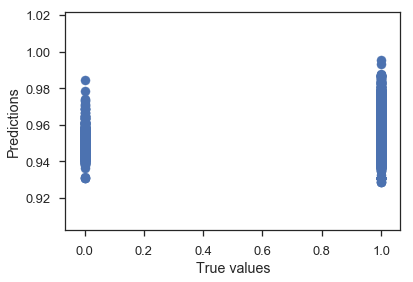

In [35]:
from matplotlib import pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel("True values")
plt.ylabel("Predictions")

In [36]:
model.score(X_test, y_test)

0.004004184521748777

## Logistic Regression


<li> Here, we have carried out Logistic regression on the model to find the accuracy of the training set.
<li> The model of the function LogisticRegression() takes two parameters viz. X, which in this case is the predictor "Prevailing_Wages" and Y, which is our target variable "Case_Status"
<li> OUTCOME - As the accuracy of the model is 0.953, ie. 95%, we can say that the Salary of the applicant has an impact on the Case_Status. 

In [37]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

X = df["Prevailing_Wages"].values.reshape(-1,1)
y = target["Case_Status"].values.reshape(-1,1)

model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

C:\Users\kshit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.95385734849803061

In [38]:
from sklearn.model_selection import train_test_split
columns ="Number_of_Applications Prevailing_Wages ".split()
df= pd.DataFrame(data=result_data, columns=columns)
y = target["Case_Status"]
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [40]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.954


Compute precision, recall, F-measure and support


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.20      0.00      0.00       600
          1       0.95      1.00      0.98     12044

avg / total       0.92      0.95      0.93     12644



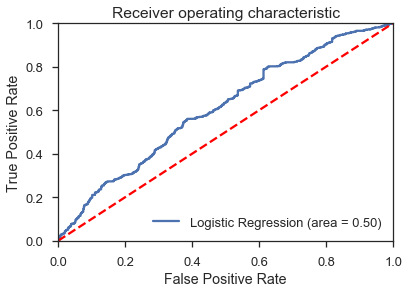

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# Data Visualization

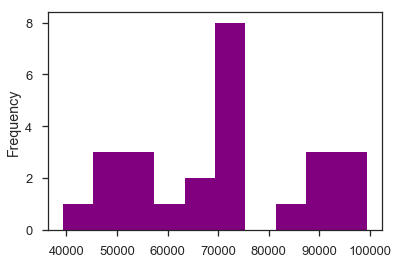

In [43]:
result_data['Prevailing_Wages'].head(25).plot(kind='hist',color = 'purple')

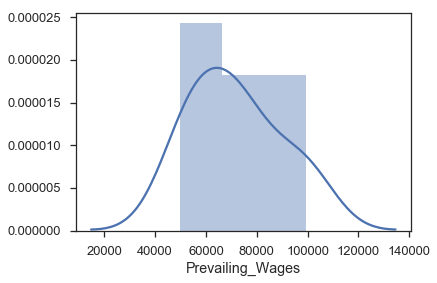

In [44]:
ax=sns.distplot(result_data.head(10).Prevailing_Wages.dropna())

In [46]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
 
output_file("colormapped_bars.html")
 
states = ["CA", "TX", "NJ", "NY", "IL", "MA"]
Case_Status = result_data.Employer_State.value_counts().head(6)
 
source = ColumnDataSource(data=dict(states=states, Case_Status=Case_Status))
 
p = figure(x_range=states, plot_height=400, toolbar_location=None, title="States")
p.vbar(x='states', top='Case_Status', width=0.9, source=source, legend="states",
       line_color='white', fill_color=factor_cmap('states', palette=Spectral6, factors=states))
 
p.xgrid.grid_line_color = None
p.y_range.start = 2400
p.y_range.end = 17000
p.legend.orientation = "horizontal"
p.legend.location = "top_center"
 
show(p)


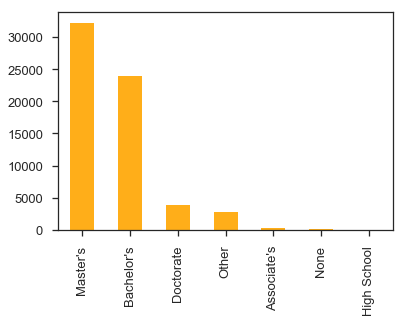

In [47]:
result_data["Education"]=result_data["Education"].replace( [0, 1, 2, 3, 4, 5, 6],["Bachelor's", "Doctorate", "Master's", "Other", "High School", "None",
        "Associate's"])
result_data['Education'].value_counts().head(15).plot(kind='bar',alpha = 0.9, color ='orange')

<li> Here, we plot a graph showing the number of Certified and Denied visa applications for the top 10 countries by the number of Visa Applicants. 

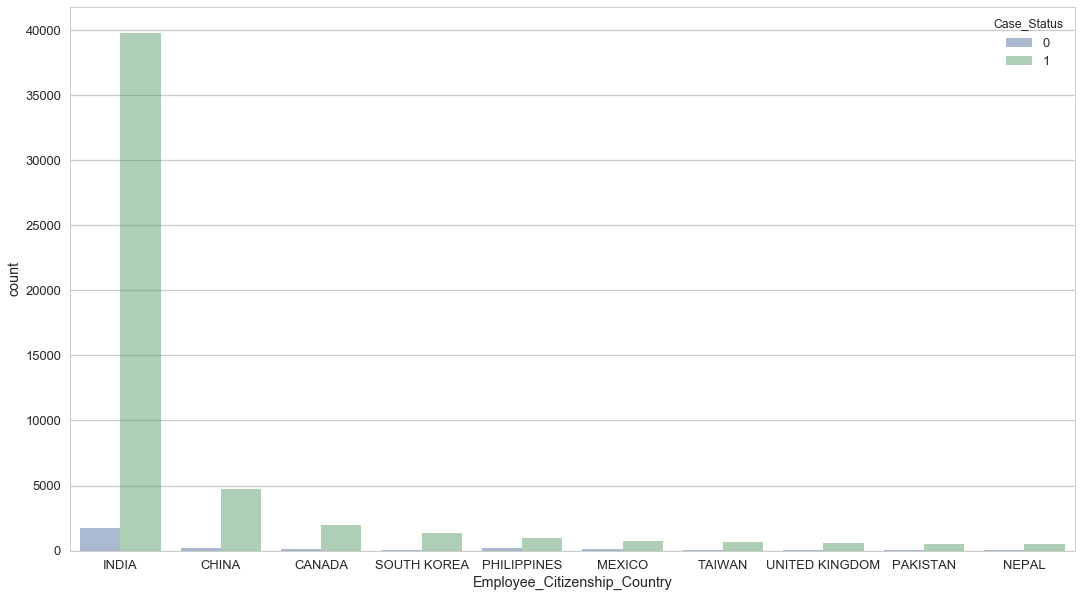

In [48]:
#Graph showing the number of Certified and Denied visa applications for the top 10 countries by number of visa applicants

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.countplot(ax = ax, x='Employee_Citizenship_Country', data = result_data, hue='Case_Status', \
              order=result_data.Employee_Citizenship_Country.value_counts().iloc[:10].index,alpha = 0.5)#, palette=pkmn_type_colors)

<li> This plot shows the number of applications submitted by the top 10 employers in the US.

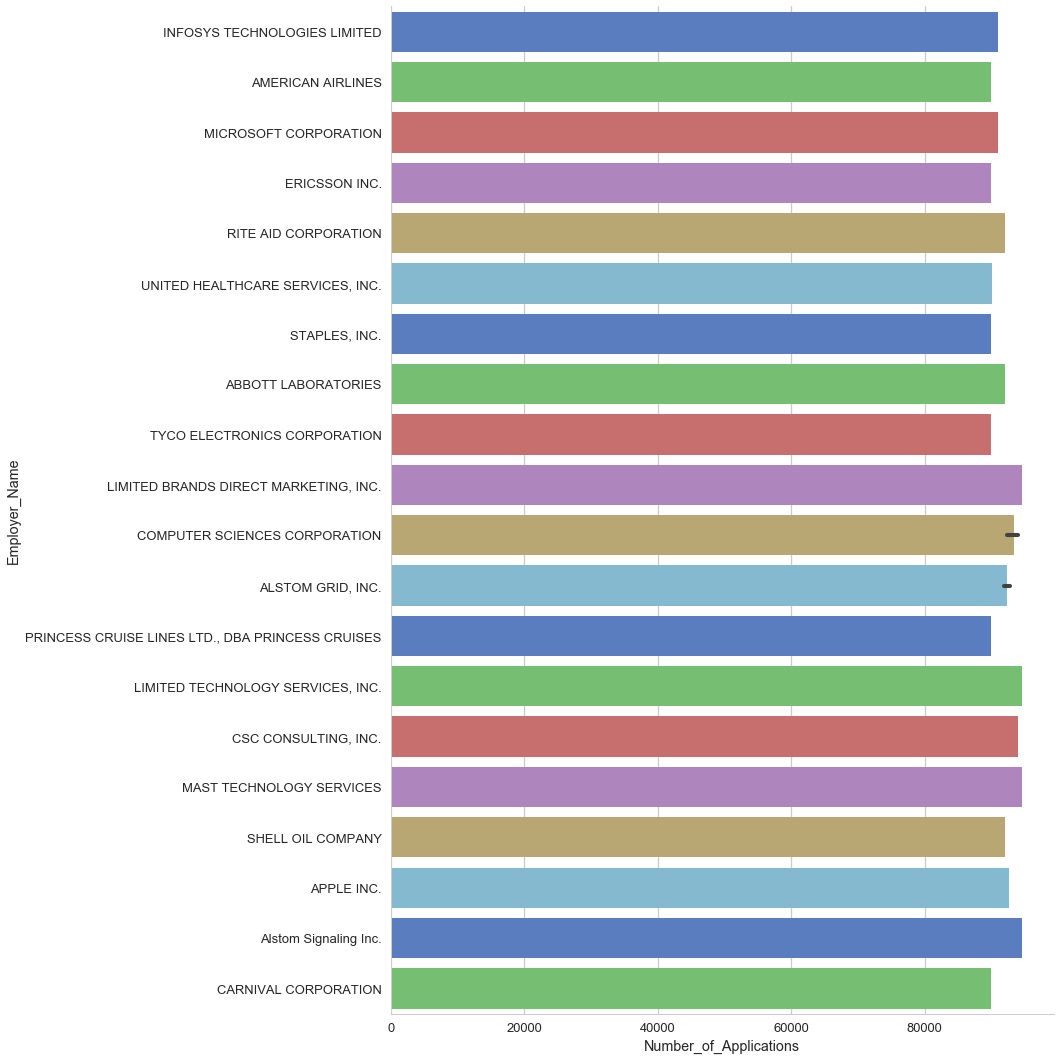

In [49]:
#Scatterplot
g = sns.factorplot(y="Employer_Name", x="Number_of_Applications", data=result_data.query('90000<=Number_of_Applications<=95000'),size=15, kind='bar', palette='muted')

<li> The following boxpolot gives us the number of applications done by the employers based on the salary of the applicant.

C:\Users\kshit\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1843: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
C:\Users\kshit\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1844: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
C:\Users\kshit\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\kshit\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)


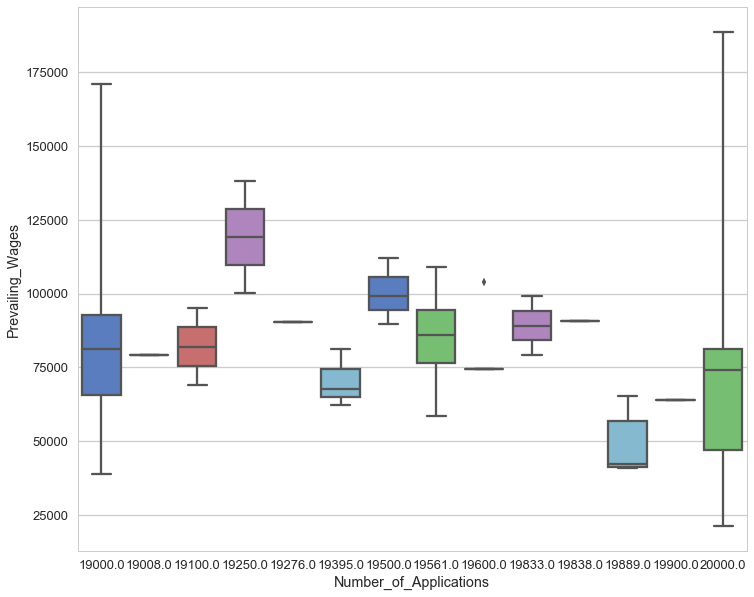

In [50]:
f, ax = plt.subplots(figsize=(12,10))
sns.boxplot(y="Prevailing_Wages", x="Number_of_Applications", data=result_data.query('19000<=Number_of_Applications<=20000'),
            whis=np.inf, palette="muted")

<li> The following factorplot shows the Wages of Certified and Denied visa applicantions based on the Education of the Applicant.

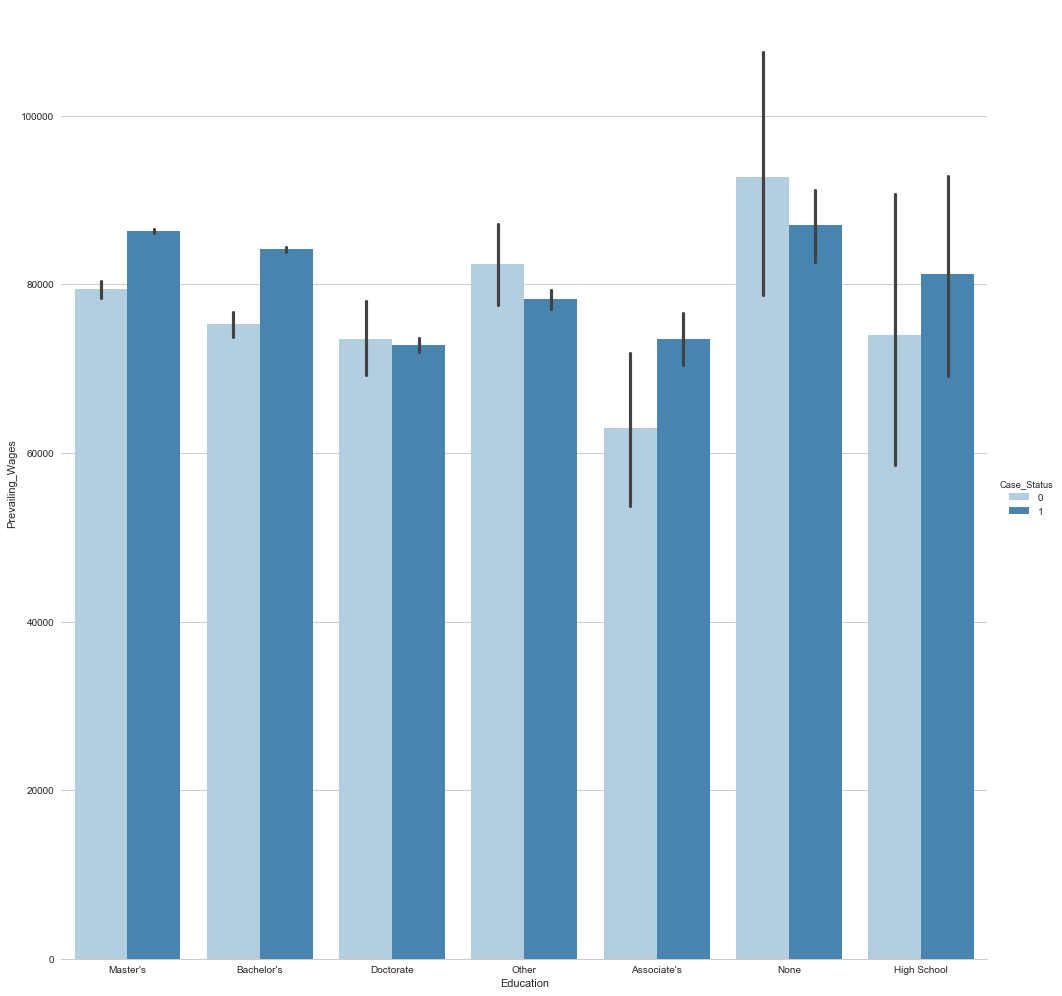

In [51]:
sns.set(style="whitegrid")
#Using the the function set , the background is set to white
 
#factorplot():The default plot that is shown is a point plot, but other seaborn categorical plots can be chosen with the kind parameter, including box plots, violin plots, bar plots, or strip plots.
 
g = sns.factorplot(x="Education", y="Prevailing_Wages", hue="Case_Status",  data=result_data.query('125000>Prevailing_Wages>5000'),
                   order=result_data.Education.value_counts().iloc[:10].index,
                   size=14, kind="bar", palette="Blues")
 
g.despine(left=True)
#despine() : it removes the top and rigth spine from the graph. Left =true removes the left spine.
 
# set_ylabels(): It is used to lable the axis of the graph with appropriate names
g.set_ylabels("Prevailing_Wages")
g.set_xlabels("Education")

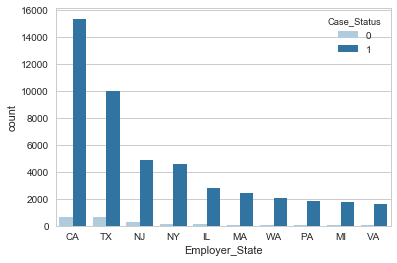

In [52]:
sns.countplot(x='Employer_State',data=result_data,hue="Case_Status",palette="Paired", order=result_data.Employer_State.value_counts().iloc[:10].index)

## Conclusion and future work
<li> In conclusion, Linear Regression and Logistic Regression are all the feasible models for this H1B petition predictive task. 
<li>These three models utilized the features like, Prevailing_Wage, Education, and Number_of_Applications which seem to be the major factors affecting the H1-B visa application decision.
<li>In the future work,the neglected data of the WITHDRAW status could also be taken into consideration to improve the accuracy.
<li>Furthermore, we will try to bring the geographical information(longitude and latitude) to improve this model.
